In [2]:
import os
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
from src.support_function import str_to_datetime
from matplotlib import pyplot as plt

## 循环读取增压站的数据

In [2]:
import sys
sys.path.append('..')

In [3]:
warnings.filterwarnings('ignore')

In [5]:
root1 = '../Dataset'
root2 = '增压站数据201720182019'

In [7]:
folder_group_list = os.listdir(os.path.join(root1, root2))
folder_group_list = np.array(folder_group_list).reshape(5,3)

In [8]:
def str_to_timestamp(x):
    return datetime.timestamp(datetime.strptime(x, '%Y/%m/%d-%H:%M:%S'))
def str_to_nan(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

In [9]:
columns =['三井累计出厂流量（新）', '三井总出厂压力（新）', 
          '三角场1号出厂压力', '三角场出厂流量累计',
       '新岗1#出水累计流量', '新岗1#出水压力', 
          '出厂总的流量', '出厂总的压力',
          '郑陆总出口累积流量', '郑陆总管压力']
start_time = int(datetime.timestamp(datetime(2017,1,1)))
end_time = int(datetime.timestamp(datetime(2019,9,1)))
time_list = list(range(start_time, end_time, 60*15))
df_folder_group = pd.DataFrame(columns=columns)
df_folder_group['timestamp'] = time_list
df_folder_group['datetime'] = df_folder_group['timestamp'].apply(datetime.fromtimestamp)
df_folder_group = df_folder_group.set_index('timestamp')

In [16]:
warnings.filterwarnings('ignore')
df_folder_list =list()
for folder_group in folder_group_list:
    df_list = list()
    for folder in folder_group:
        file_list = os.listdir(os.path.join(root1, root2, folder))
        for file in file_list:
            df = pd.read_excel(os.path.join(root1, root2, folder, file), header=1, usecols=[0,1,2,3])
            # 时间格式转换
            df['datetime_str'] = '20' + df['日期'] + '-'+ df['时间']
            df['timestamp'] = df['datetime_str'].apply(str_to_timestamp)
            # drop 无用信息
            df.drop(columns=['日期', '时间', 'datetime_str'], inplace=True)
            # 去重，设置index，排序
            df.drop_duplicates('timestamp', keep='first', inplace=True)
            df = df.set_index('timestamp')
            df.sort_index(inplace=True)
            # 把excel中的 ’---‘ 转化为 nan
            df.iloc[:,0] = df.iloc[:, 0].apply(str_to_nan)
            df.iloc[:,1] = df.iloc[:, 1].apply(str_to_nan) 
            df_folder_group.update(df)
# df_folder_group.to_csv(os.path.join(root1, '5加压站_dataset.csv'))

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

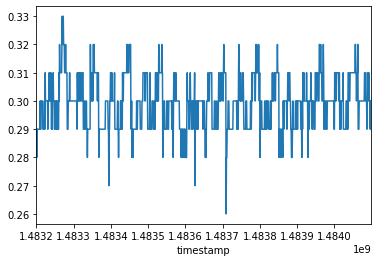

In [20]:
df_folder_group.head(1000).iloc[:,2].plot()

## 去掉2个无关的站

In [2]:
root1 = '../Dataset'
df = pd.read_csv(os.path.join(root1, '5加压站_dataset.csv'))

In [4]:
df.drop(columns = ['出厂总的流量', '出厂总的压力',
          '郑陆总出口累积流量', '郑陆总管压力'], inplace=True)

In [7]:
df.to_csv(os.path.join(root1, '3_bs_dataset.csv'))

## 读取3个增压站的数据

In [27]:
df = pd.read_csv(os.path.join(root1, '3_bs_dataset.csv'), index_col=0)

In [28]:
for i in ['三井累计出厂流量（新）', '三角场出厂流量累计', '新岗1#出水累计流量',]:
    df[i] = df[i].diff()
for column in ['三井累计出厂流量（新）', '三井总出厂压力（新）', 
          '三角场1号出厂压力', '三角场出厂流量累计',
       '新岗1#出水累计流量', '新岗1#出水压力']:
    demand_min = df[column].quantile(0.05)
    demand_max = df[column].quantile(0.98)
    mask1 = df[column] < demand_min
    mask2 = df[column] > demand_max
    df[column][mask1 | mask2] = np.nan
df = df.interpolate()
df = df.interpolate(limit_direction='backward')

G:\Anaconda\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


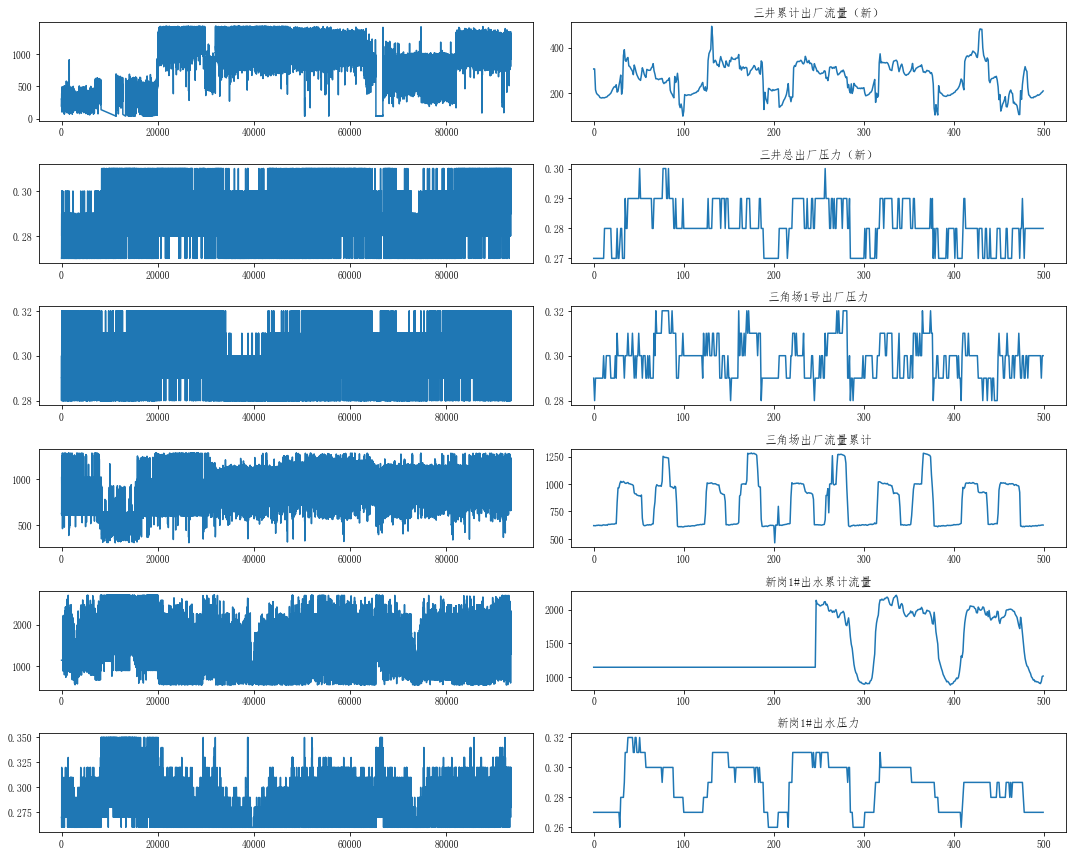

In [29]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
columns = list(df.columns)[1:7]
plt.figure(facecolor='w', figsize=(15, 2 * len(columns)))
for index, i in enumerate(columns):
    plt.subplot(len(columns),2, 2*index+1)
    plt.plot(df[i])
    plt.subplot(len(columns),2, 2*index+2)
    plt.plot(df[i].head(500))
    plt.title(i)
plt.tight_layout()
plt.show()

In [30]:
df.to_csv(os.path.join(root1, '3_bs_dataset_washed.csv'))

## 合并流量、水厂、压力 的数据

In [38]:
df = pd.read_csv(os.path.join(root1, '3_bs_dataset_washed.csv'), index_col='datetime')

In [40]:
df2 = pd.read_csv(os.path.join(root1, '15流量_dataset_washed.csv'), index_col=0)

In [42]:
df.head(10)

,Unnamed: 0,timestamp,三井累计出厂流量（新）,三井总出厂压力（新）,三角场1号出厂压力,三角场出厂流量累计,新岗1#出水累计流量,新岗1#出水压力
datetime,,,,,,,,
2017-01-01 00:00:00,0,1483200000,307.0,0.27,0.29,620.0,1143.79,0.27
2017-01-01 00:15:00,1,1483200900,307.0,0.27,0.28,620.0,1143.79,0.27
2017-01-01 00:30:00,2,1483201800,216.0,0.27,0.29,619.0,1143.79,0.27
2017-01-01 00:45:00,3,1483202700,202.0,0.27,0.29,622.0,1143.79,0.27
2017-01-01 01:00:00,4,1483203600,196.0,0.27,0.29,622.0,1143.79,0.27
2017-01-01 01:15:00,5,1483204500,193.0,0.27,0.29,624.0,1143.79,0.27
2017-01-01 01:30:00,6,1483205400,189.0,0.27,0.29,624.0,1143.79,0.27
2017-01-01 01:45:00,7,1483206300,182.0,0.27,0.29,621.0,1143.79,0.27
2017-01-01 02:00:00,8,1483207200,181.0,0.27,0.29,623.0,1143.79,0.27


In [41]:
df_all = df.join(df2)

In [43]:
df_all.drop(columns='Unnamed: 0', inplace=True)

In [44]:
df_all

,timestamp,三井累计出厂流量（新）,三井总出厂压力（新）,三角场1号出厂压力,三角场出厂流量累计,新岗1#出水累计流量,新岗1#出水压力,552叶汤路Q,625 港区大道Q,637 新338省道Q,666 常戚路Q,727 玉龙路Q,785 长江路龙城大道Q,794 龙江路Q,800 健身路Q
datetime,,,,,,,,,,,,,,,
2017-01-01 00:00:00,1483200000,307.0,0.27,0.290,620.0,1143.79,0.27,172.0,146.0,156.0,63.0,109.0,286.0,261.0,45.0
2017-01-01 00:15:00,1483200900,307.0,0.27,0.280,620.0,1143.79,0.27,172.0,146.0,156.0,63.0,109.0,286.0,261.0,45.0
2017-01-01 00:30:00,1483201800,216.0,0.27,0.290,619.0,1143.79,0.27,167.0,151.0,154.0,60.0,107.0,283.0,262.0,45.0
2017-01-01 00:45:00,1483202700,202.0,0.27,0.290,622.0,1143.79,0.27,164.0,153.0,147.0,62.0,107.0,270.0,263.0,44.0
2017-01-01 01:00:00,1483203600,196.0,0.27,0.290,622.0,1143.79,0.27,162.0,163.0,146.0,58.0,101.0,266.0,247.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 22:45:00,1567262700,1204.0,0.30,0.295,660.0,1795.65,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31 23:00:00,1567263600,1222.0,0.31,0.290,782.0,1704.94,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31 23:15:00,1567264500,1280.0,0.29,0.280,812.0,1425.59,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_all.to_csv(os.path.join(root1, '3bs_8q_dataset_washed.csv'))

In [45]:
df3 = pd.read_csv(os.path.join(root1, '4p_dataset.csv'), index_col = 0)
df3.shape

(853593, 4)

In [46]:
df3 = df3.iloc[int(df3.shape[0]/8): int(df3.shape[0]*0.9)]

In [47]:
for column in list(df3.columns):
    df3[column] = df3[column].clip(0.25, 0.32)
    demand_min = df3[column].quantile(0.05)
    demand_max = df3[column].quantile(0.98)
    mask1 = df3[column] < demand_min
    mask2 = df3[column] > demand_max
    df3[column][mask1 | mask2] = np.nan
df3 = df3.interpolate(limit_direction='both')
df3 = df3.rolling(5).mean()

In [48]:
df_all_all = df_all.join(df3)
df_all_all = df_all_all.iloc[int(df_all_all.shape[0]/8): int(df_all_all.shape[0]*0.9)]

In [49]:
df_all_all

,timestamp,三井累计出厂流量（新）,三井总出厂压力（新）,三角场1号出厂压力,三角场出厂流量累计,新岗1#出水累计流量,新岗1#出水压力,552叶汤路Q,625 港区大道Q,637 新338省道Q,666 常戚路Q,727 玉龙路Q,785 长江路龙城大道Q,794 龙江路Q,800 健身路Q,0101300121,0101200259,0101200257,0101200252
datetime,,,,,,,,,,,,,,,,,,,
2017-05-02 15:00:00,1493708400,259.0,0.29,0.30,370.142857,1798.00,0.31,220.0,154.0,173.0,75.0,190.0,426.0,427.0,69.0,NaN,NaN,NaN,NaN
2017-05-02 15:15:00,1493709300,264.0,0.29,0.29,374.785714,1800.00,0.31,223.0,143.0,172.0,75.0,192.0,436.0,435.0,69.5,NaN,NaN,NaN,NaN
2017-05-02 15:30:00,1493710200,269.0,0.29,0.29,379.428571,1802.00,0.31,227.0,134.0,175.0,77.0,192.0,435.0,430.0,70.0,NaN,NaN,NaN,NaN
2017-05-02 15:45:00,1493711100,273.0,0.29,0.29,384.071429,1798.00,0.31,223.0,147.0,176.0,77.0,194.0,421.0,429.0,70.5,NaN,NaN,NaN,NaN
2017-05-02 16:00:00,1493712000,279.0,0.29,0.29,388.714286,1806.50,0.31,227.0,155.0,176.0,75.0,196.0,426.0,444.0,71.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-26 15:30:00,1558855800,1164.0,0.29,0.30,887.000000,1125.00,0.28,248.0,170.0,223.0,75.0,154.0,403.0,339.0,62.0,NaN,NaN,NaN,NaN
2019-05-26 15:45:00,1558856700,1166.0,0.29,0.30,880.000000,1125.00,0.28,244.0,169.0,222.0,77.0,151.0,395.0,337.0,64.0,NaN,NaN,NaN,NaN
2019-05-26 16:00:00,1558857600,1172.0,0.29,0.30,890.000000,1125.00,0.28,258.0,167.0,227.0,77.0,160.0,418.0,346.0,66.0,NaN,NaN,NaN,NaN


In [4]:
df_all_all.to_csv(os.path.join(root1, '3bs_8q_4p_dataset.csv'))

NameError: name 'df_all_all' is not defined

## 分析数据集

In [30]:
root1 = '../Dataset'
df = pd.read_csv(os.path.join(root1, '3bs_8q_4p_dataset_washed.csv'),
                parse_dates=['datetime'],
                index_col=0)

In [31]:
df.head(2)

,datetime,timestamp,q1,p1,p2,q2,q3,p3,q4,q5,q6,q7,q8,q9,q10,q11,p4,p5,p6,p7
0,2017-05-05 18:00:00,1493978400,408.0,0.28,0.29,411.0,2252.5,0.31,287.0,162.0,245.0,108.0,222.0,473.0,492.0,74.0,0.272444,0.273333,0.25,0.26620
2,2017-05-05 18:30:00,1493980200,402.0,0.29,0.29,406.0,2250.0,0.31,284.0,169.0,250.0,115.0,223.0,494.0,491.0,76.0,0.273286,0.276000,0.25,0.26725


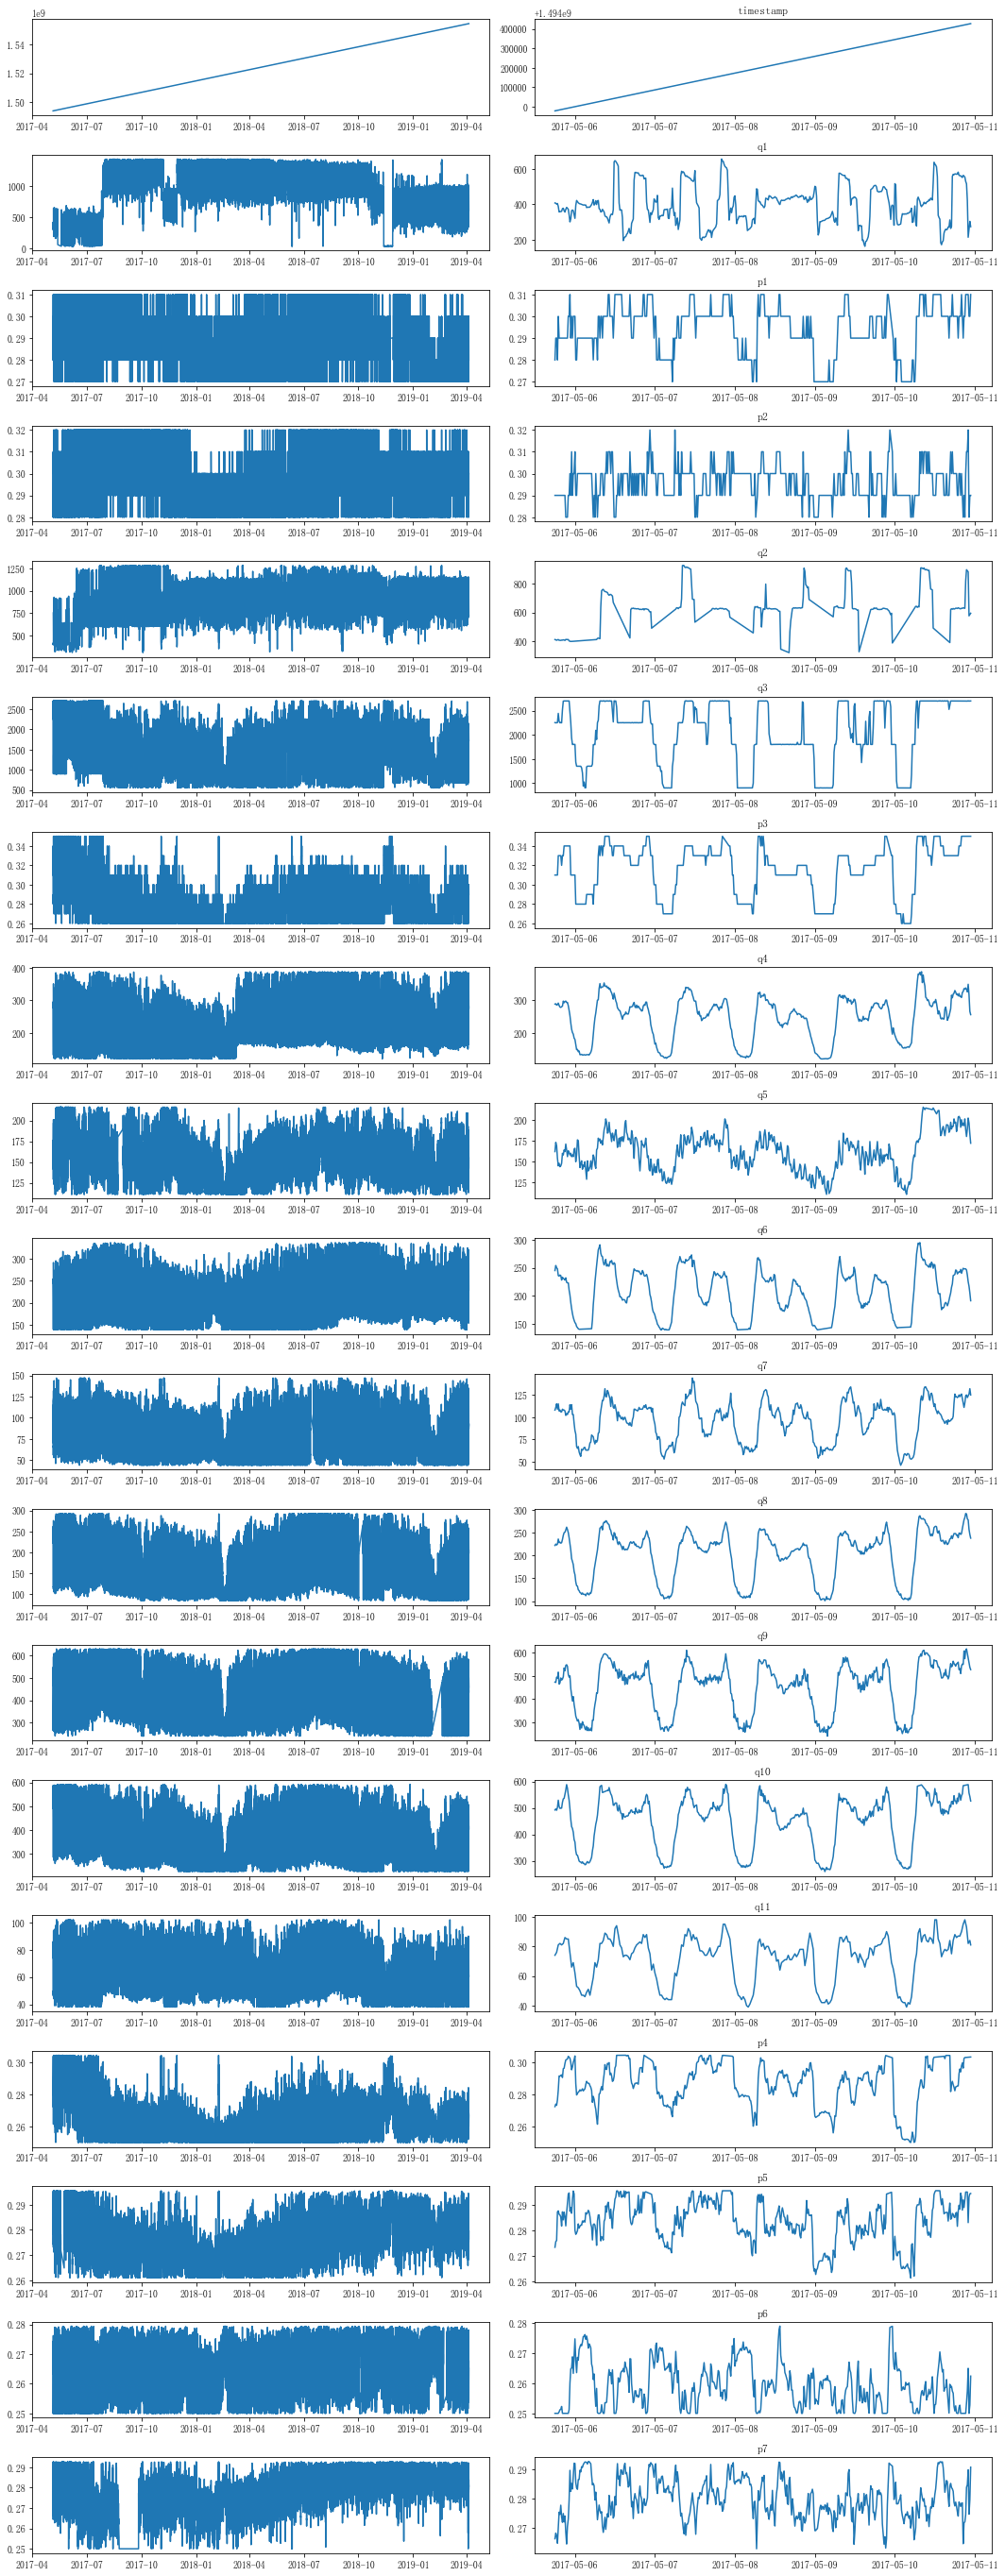

In [9]:
columns = list(df.columns)
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

plt.figure(facecolor='w', figsize=(15, 2 * len(columns)))
for index, i in enumerate(columns):
    plt.subplot(len(columns),2, 2*index+1)
    plt.plot(df[i])
    plt.subplot(len(columns),2, 2*index+2)
    plt.plot(df[i].head(500))
    plt.title(i)
plt.tight_layout()
plt.savefig('../result/figures/dataset.png',format='png',dpi=1000)
plt.show()

In [54]:
df.columns

Index(['timestamp', '三井累计出厂流量（新）', '三井总出厂压力（新）', '三角场1号出厂压力', '三角场出厂流量累计',
       '新岗1#出水累计流量', '新岗1#出水压力', '552叶汤路Q', '625 港区大道Q', '637 新338省道Q',
       '666 常戚路Q', '727 玉龙路Q', '785 长江路龙城大道Q', '794  龙江路Q', '800 健身路Q',
       '0101300121', '0101200259', '0101200257', '0101200252'],
      dtype='object')

df = df.rename(columns={'三井累计出厂流量（新）': 'q1',
                   '三井总出厂压力（新）': 'p1',
                   '三角场1号出厂压力': 'p2',
                   '三角场出厂流量累计': 'q2',
                   '新岗1#出水累计流量':'q3',
                   '新岗1#出水压力': 'p3',
                   '552叶汤路Q': 'q4',
                   '625 港区大道Q': 'q5', 
                   '637 新338省道Q': 'q6',
                   '666 常戚路Q': 'q7',
                   '727 玉龙路Q': 'q8',
                   '785 长江路龙城大道Q': 'q9',
                   '794  龙江路Q': 'q10', 
                   '800 健身路Q': 'q11',
                   '0101300121': 'p4',
                   '0101200259':'p5',
                   '0101200257': 'p6',
                   '0101200252':'p7'})
df.to_csv(os.path.join(root1, '3bs_8q_dataset_washed.csv'))

## 切掉带nan的行

In [56]:
df = pd.read_csv(os.path.join(root1, '3bs_8q_dataset_washed.csv'))

In [57]:
df2 = df.iloc[300:-5000, :]

In [59]:
df2.to_csv(os.path.join(root1, '3bs_8q_dataset_washed.csv'))